In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cityblock
from scipy.spatial.distance import minkowski
from scipy.spatial.distance import cosine
from scipy.spatial.distance import jaccard
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import distance
import seaborn as sns

In [46]:
df2 = pd.read_csv(r'A:\Учёба\практика 2 курс\tv\data_citilink.csv')
df1 = pd.read_csv(r'A:\Учёба\практика 2 курс\tv\data_eldorado.csv')

In [47]:
df_1 = pd.DataFrame(columns=['num','rating','price', 'class'])
df_2 = pd.DataFrame(columns=['num','rating','price', 'class'])

num = {'num','class'}

def levenshtein_distance(str1, str2):

    matrix = [[0] * (len(str2) + 1) for _ in range(len(str1) + 1)]
    for i in range(len(str1) + 1):
        matrix[i][0] = i
    for j in range(len(str2) + 1):
        matrix[0][j] = j

    for i in range(1, len(str1) + 1):
        for j in range(1, len(str2) + 1):
            cost = 0 if str1[i - 1] == str2[j - 1] else 1
            matrix[i][j] = min(
                matrix[i - 1][j] + 1,  
                matrix[i][j - 1] + 1,  
                matrix[i - 1][j - 1] + cost,  
            )

    return matrix[-1][-1]

for idx, name_1 in enumerate(df1['Название']):
    min_distance = 100
    matched_name = ''

    for name_2 in df2["Название"]:
        distance = levenshtein_distance(name_1, name_2)
        if distance < min_distance:
            min_distance = distance
            matched_name = name_2

    df_1.loc[idx] = [df1['Количество отзывов'][min_distance], df1['Рейтинг'][min_distance], df1['Цена'][min_distance], 1]
    df_2.loc[idx] = [df2['Количество отзывов'][min_distance], df2['Рейтинг'][min_distance], df2['Цена'][min_distance], 2]

    
    




In [48]:
df_1.head(100)

,num,rating,price,class
0,4.0,0.0,0.0,1.0
1,15.0,0.0,49990.0,1.0
2,1.0,0.0,23890.0,1.0
3,16.0,0.0,52990.0,1.0
4,12.0,0.0,44990.0,1.0
...,...,...,...,...
95,1.0,0.0,23890.0,1.0
96,15.0,0.0,47990.0,1.0
97,17.0,0.0,39390.0,1.0
98,20.0,0.0,30990.0,1.0


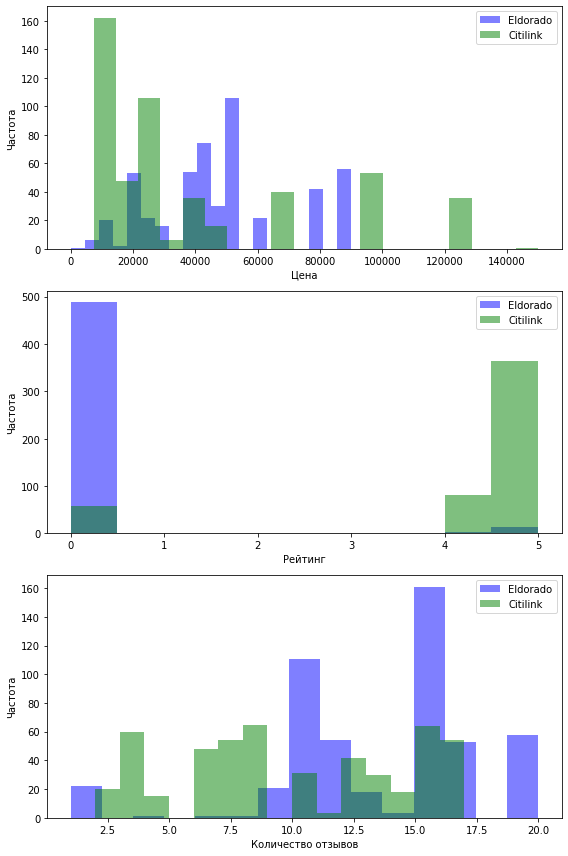

In [49]:
prices1 = df_1['price']
ratings1 = df_1['rating']
reviews1 = df_1['num']

prices2 = df_2['price']
ratings2 = df_2['rating']
reviews2 = df_2['num']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))


axes[0].hist(prices1, bins=20, alpha=0.5, color='blue', label='Eldorado')
axes[0].hist(prices2, bins=20, alpha=0.5, color='green', label='Citilink')
axes[0].set_xlabel('Цена')
axes[0].set_ylabel('Частота')
axes[0].legend()


axes[1].hist(ratings1, bins=10, alpha=0.5, color='blue', label='Eldorado')
axes[1].hist(ratings2, bins=10, alpha=0.5, color='green', label='Citilink')
axes[1].set_xlabel('Рейтинг')
axes[1].set_ylabel('Частота')
axes[1].legend()


axes[2].hist(reviews1, bins=15, alpha=0.5, color='blue', label='Eldorado')
axes[2].hist(reviews2, bins=15, alpha=0.5, color='green', label='Citilink')
axes[2].set_xlabel('Количество отзывов')
axes[2].set_ylabel('Частота')
axes[2].legend()


plt.tight_layout()


plt.show()


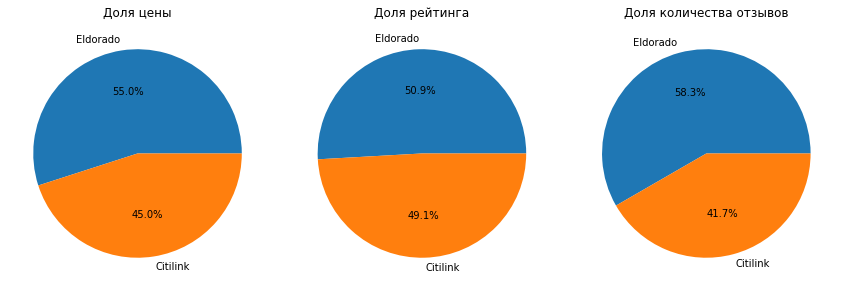

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))


valid_prices1 = prices1[prices1 > 0]
valid_prices2 = prices2[prices2 > 0]
axes[0].pie([valid_prices1.sum(), valid_prices2.sum()], labels=['Eldorado', 'Citilink'], autopct='%1.1f%%')
axes[0].set_title('Доля цены')


valid_ratings1 = ratings1[ratings1 > 0]
valid_ratings2 = ratings2[ratings2 > 0]
axes[1].pie([valid_ratings1.mean(), valid_ratings2.mean()], labels=['Eldorado', 'Citilink'], autopct='%1.1f%%')
axes[1].set_title('Доля рейтинга')


valid_reviews1 = reviews1[reviews1 > 0]
valid_reviews2 = reviews2[reviews2 > 0]
axes[2].pie([valid_reviews1.sum(), valid_reviews2.sum()], labels=['Eldorado', 'Citilink'], autopct='%1.1f%%')
axes[2].set_title('Доля количества отзывов')


plt.tight_layout()


plt.show()


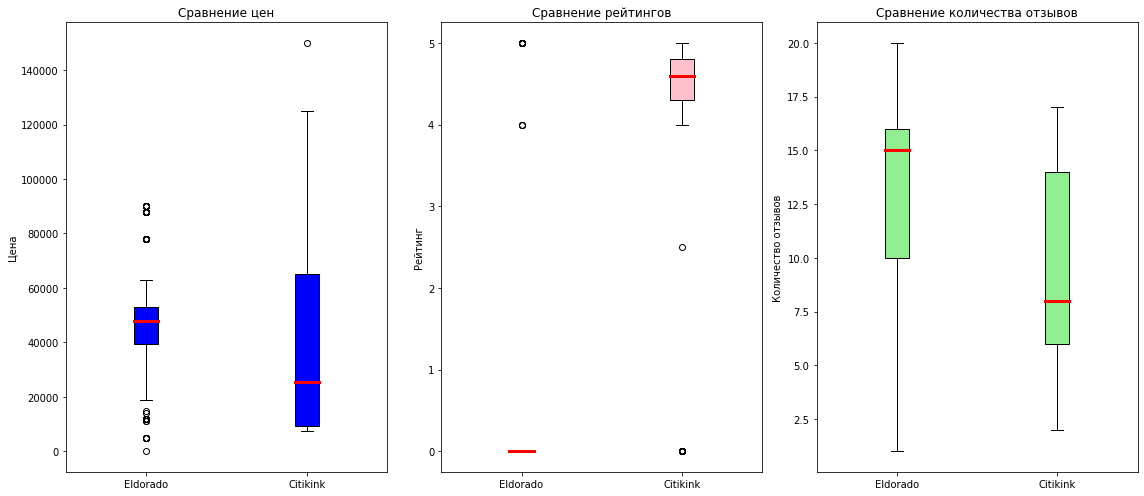

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))

axes[0].boxplot([prices1, prices2], patch_artist=True, boxprops=dict(facecolor='blue', edgecolor='black'),  medianprops=dict(color='red', linewidth=3))
axes[0].set_xticklabels(['Eldorado', 'Citikink'])
axes[0].set_ylabel('Цена')
axes[0].set_title('Сравнение цен')

axes[1].boxplot([ratings1, ratings2], patch_artist=True, boxprops=dict(facecolor='pink', edgecolor='black'),  medianprops=dict(color='red', linewidth=3))
axes[1].set_xticklabels(['Eldorado', 'Citikink'])
axes[1].set_ylabel('Рейтинг')
axes[1].set_title('Сравнение рейтингов')

axes[2].boxplot([reviews1, reviews2], patch_artist=True, boxprops=dict(facecolor='lightgreen', edgecolor='black'),  medianprops=dict(color='red', linewidth=3))
axes[2].set_xticklabels(['Eldorado', 'Citikink'])
axes[2].set_ylabel('Количество отзывов')
axes[2].set_title('Сравнение количества отзывов')

fig.set_size_inches(16, 7)
plt.tight_layout()
plt.show()

Машинно обучение

In [52]:
n_clusters = 5  
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(df1.drop(columns='Название'))
cluster_labels = kmeans.labels_
df1['Cluster'] = cluster_labels

In [53]:
df1['Cluster'].unique()

array([0, 4, 3, 2, 1])

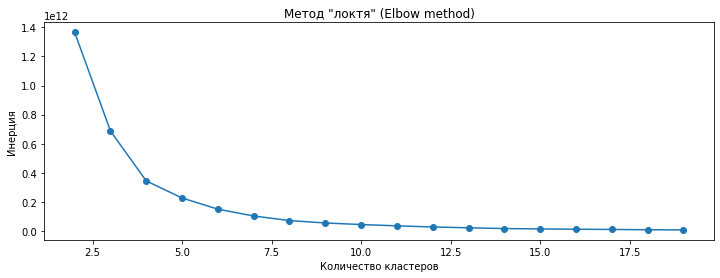

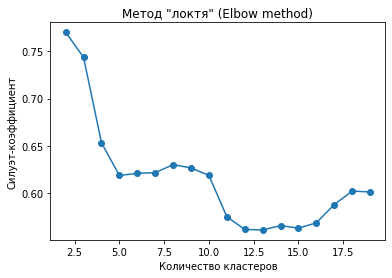

In [54]:
fig, axes = plt.subplots(figsize=(12, 4))
features = df2[['Рейтинг','Цена']]  

inertias = []

silhouette_scores = []

for k in range(2, 20):
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)

    
    inertia = kmeans.inertia_
    inertias.append(inertia)

    
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(features, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 20), inertias, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.title('Метод "локтя" (Elbow method)')
plt.show()


plt.plot(range(2, 20), silhouette_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Силуэт-коэффициент')
plt.title('Метод "локтя" (Elbow method)')
plt.show()


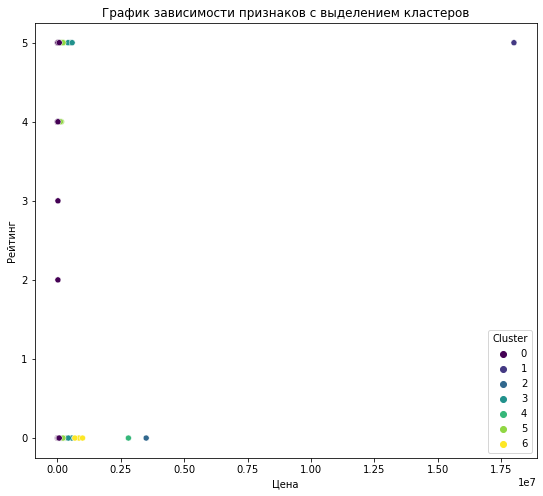

In [55]:
fig, axes = plt.subplots( figsize=(9, 8))
features = df1[['Цена', 'Рейтинг']]

k = 7  
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(features)

labels = kmeans.labels_

features_labeled = features.copy()
features_labeled['Cluster'] = labels

sns.scatterplot(x='Цена', y='Рейтинг', hue='Cluster', data=features_labeled, palette='viridis')
plt.xlabel('Цена')
plt.ylabel('Рейтинг')
plt.title('График зависимости признаков с выделением кластеров')
plt.show()



In [56]:
df_1 = df1.drop(columns=['Название', 'Cluster'])
df_2 = df1.drop(columns=['Название', 'Cluster'])

In [57]:
def levenshtein_distance(str1, str2):
    
    matrix = [[0] * (len(str2) + 1) for _ in range(len(str1) + 1)]

    
    for i in range(len(str1) + 1):
        matrix[i][0] = i
    for j in range(len(str2) + 1):
        matrix[0][j] = j

    
    for i in range(1, len(str1) + 1):
        for j in range(1, len(str2) + 1):
            cost = 0 if str1[i - 1] == str2[j - 1] else 1
            matrix[i][j] = min(
                matrix[i - 1][j] + 1,  
                matrix[i][j - 1] + 1,  
                matrix[i - 1][j - 1] + cost,  
            )

    
    return matrix[-1][-1]

In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Цена                         504 non-null    float64
 1   Акустическая схема           504 non-null    int64  
 2   Таймер включения/выключения  504 non-null    float64
 3   Разъем для наушников         504 non-null    float64
 4   Встроенный сабвуфер          504 non-null    float64
 5   Прогрессивная развертка      504 non-null    float64
 6   Вес без подставки            504 non-null    float64
 7   Время отклика пикселя        504 non-null    float64
 8   Гарантия                     504 non-null    float64
 9   Разрешение                   504 non-null    int64  
 10  Поддержка NFC                504 non-null    float64
 11  Управление со смартфона      504 non-null    float64
 12  Встроенный Wi-Fi             504 non-null    float64
 13  Встроенный Bluetooth

In [59]:
df1.columns

Index(['Цена', 'Акустическая схема', 'Таймер включения/выключения',
       'Разъем для наушников', 'Встроенный сабвуфер',
       'Прогрессивная развертка', 'Вес без подставки', 'Время отклика пикселя',
       'Гарантия', 'Разрешение', 'Поддержка NFC', 'Управление со смартфона',
       'Встроенный Wi-Fi', 'Встроенный Bluetooth', 'Поддержка HDR',
       'Контрастность', 'Размер VESA', 'Телетекст', 'Яркость экрана',
       'Мощность сабвуфера', 'Частота обновления', 'Родительский контроль',
       'Диагональ', 'Страна производитель', 'Операционная система', 'Название',
       'Соотношение сторон', 'Объем встроенной памяти',
       'Объем оперативной памяти', 'Рейтинг', 'Количество отзывов',
       'Тип панели', 'Цвет', 'Цифровое шумоподавление', 'Cluster'],
      dtype='object')

In [60]:
df_1_norm = df1
df_2_norm = df2

In [65]:
def find_k_nearest_neighbors(query_object, data, k):
    distances = []
    for i, obj in enumerate(data):
        dist = distance.minkowski(query_object, obj)  
        distances.append((dist, i))  
    
    
    distances.sort()
    
    
    k_nearest_indices = [index for (_, index) in distances[:k]]
    
    return k_nearest_indices


df_1 = pd.DataFrame(columns=['num','rating','price', 'class'])
df_2 = pd.DataFrame(columns=['num','rating','price', 'class'])

features_db1 = df_1_norm.drop(columns=['Название', 'Cluster']).values
features_db2 = df_2_norm.drop(columns='Название').values

k = 3  
similar_items = []
for i, item_db1 in enumerate(features_db1):
    k_nearest_indices = find_k_nearest_neighbors(item_db1, features_db2, k)
    distanc = 100
    for o in range(0, 3):
        ans = levenshtein_distance(df1['Название'][i], df2['Название'][k_nearest_indices[o]])
        if ans < distanc:
            distanc = ans

    df_1.loc[i] = [df1['Количество отзывов'][distanc], df1['Рейтинг'][distanc], df1['Цена'][distanc], 1]
    df_2.loc[i] = [df2['Количество отзывов'][distanc], df2['Рейтинг'][distanc], df2['Цена'][distanc], 2]



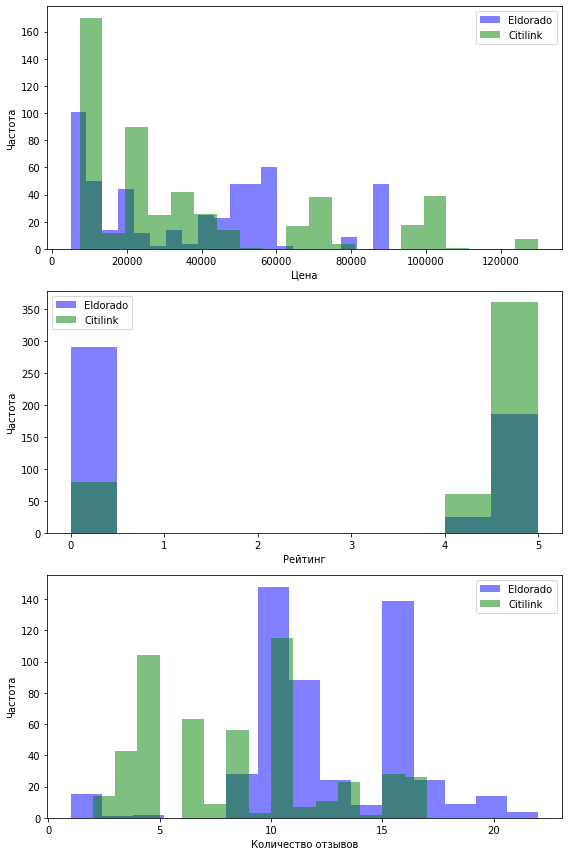

In [66]:
prices1 = df_1['price']
ratings1 = df_1['rating']
reviews1 = df_1['num']

prices2 = df_2['price']
ratings2 = df_2['rating']
reviews2 = df_2['num']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

axes[0].hist(prices1, bins=20, alpha=0.5, color='blue', label='Eldorado')
axes[0].hist(prices2, bins=20, alpha=0.5, color='green', label='Citilink')
axes[0].set_xlabel('Цена')
axes[0].set_ylabel('Частота')
axes[0].legend()

axes[1].hist(ratings1, bins=10, alpha=0.5, color='blue', label='Eldorado')
axes[1].hist(ratings2, bins=10, alpha=0.5, color='green', label='Citilink')
axes[1].set_xlabel('Рейтинг')
axes[1].set_ylabel('Частота')
axes[1].legend()

axes[2].hist(reviews1, bins=15, alpha=0.5, color='blue', label='Eldorado')
axes[2].hist(reviews2, bins=15, alpha=0.5, color='green', label='Citilink')
axes[2].set_xlabel('Количество отзывов')
axes[2].set_ylabel('Частота')
axes[2].legend()

plt.tight_layout()
plt.show()

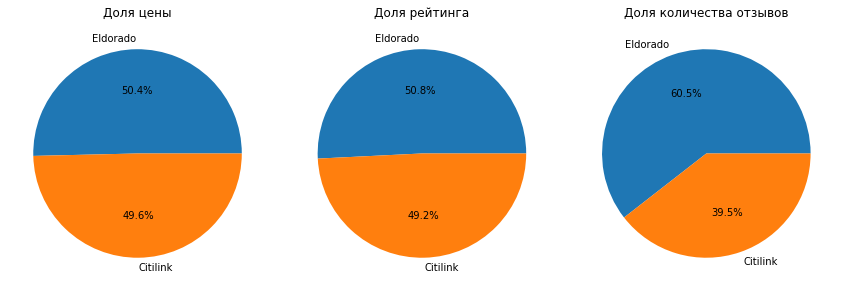

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

valid_prices1 = prices1[prices1 > 0]
valid_prices2 = prices2[prices2 > 0]
axes[0].pie([valid_prices1.sum(), valid_prices2.sum()], labels=['Eldorado', 'Citilink'], autopct='%1.1f%%')
axes[0].set_title('Доля цены')

valid_ratings1 = ratings1[ratings1 > 0]
valid_ratings2 = ratings2[ratings2 > 0]
axes[1].pie([valid_ratings1.mean(), valid_ratings2.mean()], labels=['Eldorado', 'Citilink'], autopct='%1.1f%%')
axes[1].set_title('Доля рейтинга')

valid_reviews1 = reviews1[reviews1 > 0]
valid_reviews2 = reviews2[reviews2 > 0]
axes[2].pie([valid_reviews1.sum(), valid_reviews2.sum()], labels=['Eldorado', 'Citilink'], autopct='%1.1f%%')
axes[2].set_title('Доля количества отзывов')

plt.tight_layout()
plt.show()


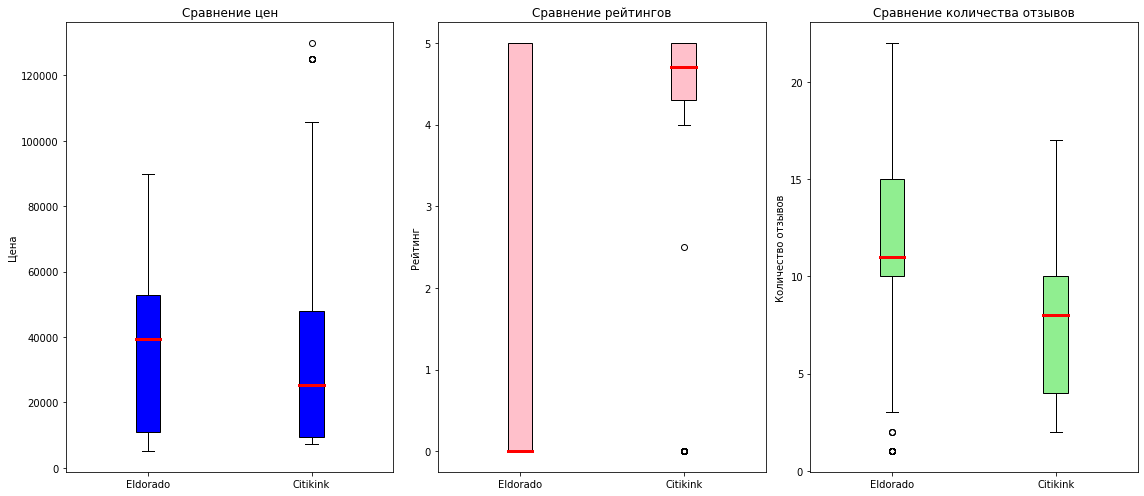

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))

axes[0].boxplot([prices1, prices2], patch_artist=True, boxprops=dict(facecolor='blue', edgecolor='black'),  medianprops=dict(color='red', linewidth=3))
axes[0].set_xticklabels(['Eldorado', 'Citikink'])
axes[0].set_ylabel('Цена')
axes[0].set_title('Сравнение цен')

axes[1].boxplot([ratings1, ratings2], patch_artist=True, boxprops=dict(facecolor='pink', edgecolor='black'),  medianprops=dict(color='red', linewidth=3))
axes[1].set_xticklabels(['Eldorado', 'Citikink'])
axes[1].set_ylabel('Рейтинг')
axes[1].set_title('Сравнение рейтингов')

axes[2].boxplot([reviews1, reviews2], patch_artist=True, boxprops=dict(facecolor='lightgreen', edgecolor='black'),  medianprops=dict(color='red', linewidth=3))
axes[2].set_xticklabels(['Eldorado', 'Citikink'])
axes[2].set_ylabel('Количество отзывов')
axes[2].set_title('Сравнение количества отзывов')

fig.set_size_inches(16, 7)
plt.tight_layout()
plt.show()